<a href="https://colab.research.google.com/github/Ankitfactech/Abdulbari_DSA/blob/master/factech_marks_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [8]:

df = pd.read_csv('/student_info.csv')

In [9]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [10]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [11]:
df.shape

(200, 2)

# Analysis of data for better understanding

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [13]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


from matplotlib import pyplot as plt
_df_0['study_hours'].plot(kind='hist', bins=20, title='study_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['student_marks'].plot(kind='hist', bins=20, title='student_marks')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='study_hours', y='student_marks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['study_hours'].plot(kind='line', figsize=(8, 4), title='study_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['student_marks'].plot(kind='line', figsize=(8, 4), title='student_marks')
plt.gca().spines[['top', 'right']].set_visible(False)

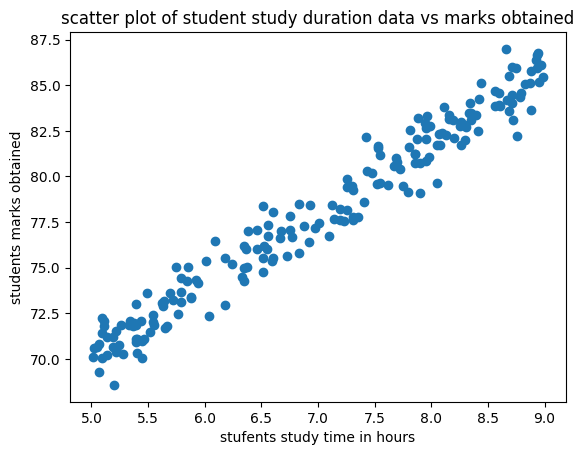

In [14]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel("stufents study time in hours")
plt.ylabel("students marks obtained")
plt.title("scatter plot of student study duration data vs marks obtained")
plt.show()

# Prepare data for ML algorithm

In [15]:
# Data cleaning

In [17]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [18]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [19]:
df2=df.fillna(df.mean())

In [21]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [22]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [23]:
# split dataset

In [37]:
X= df2.drop("student_marks",axis="columns")
y= df2.drop("study_hours",axis="columns")
print("shape of x=",X.shape)
print("shape of y=",y.shape)

shape of x= (200, 1)
shape of y= (200, 1)


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)


# Select a model and Train it

In [42]:
# y= w*x +b
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.coef_

array([[3.93571802]])

In [45]:
lr.intercept_

array([50.44735504])

In [52]:
w=3.93
b=50.44
y= w*5 +b
y

70.09

In [55]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [56]:
y_pred = lr.predict(x_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [57]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_pred"])

,study_hours,student_marks_original,student_marks_pred
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [59]:
lr.score(x_test,y_test)

0.9514124242154466

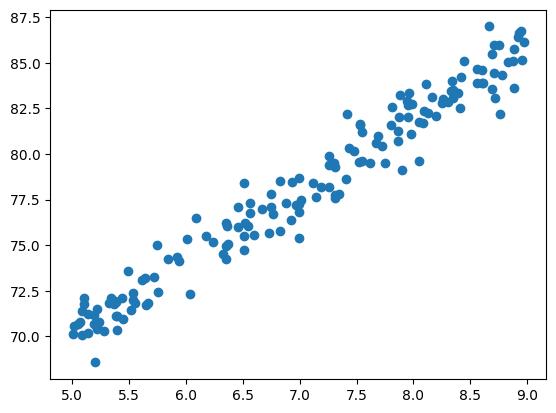

In [60]:
plt.scatter(x_train,y_train)

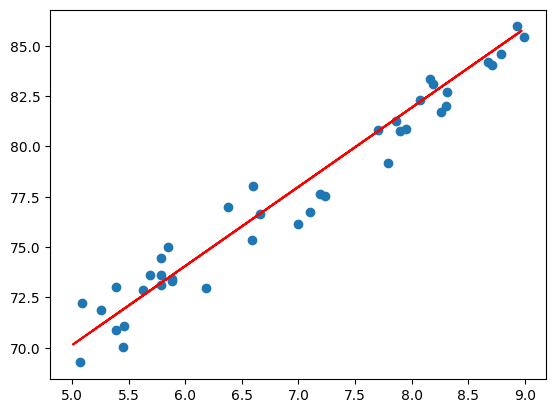

In [63]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="r")

# Prentation of My solution

# save ML model

In [65]:
import joblib
joblib.dump(lr, "factech_mark_predictor_model.pkl")

['factech_mark_predictor_model.pkl']